1. K-means 알고리즘 개요
K-means 클러스터링은 비지도 학습에서 널리 사용되는 알고리즘으로, 데이터를 k개의 군집으로 나누는 방법입니다. 각 군집은 하나의 중심점(centroid) 주위에 데이터를 배치합니다.

목적: 비슷한 특성을 가진 데이터를 묶는 것.
알고리즘 과정:
데이터에서 k개의 중심점을 무작위로 선택.
각 데이터를 가장 가까운 중심점에 할당.
새로운 중심점 계산 (할당된 데이터의 평균).
중심점이 변화하지 않을 때까지 2~3단계 반복.
2. Iris 데이터셋 소개
Iris 데이터셋은 3개의 붓꽃 종(Setosa, Versicolor, Virginica)과 꽃잎 길이, 꽃받침 길이 등의 특징을 포함하는 데이터셋입니다. 각 붓꽃 종은 50개의 샘플이 존재합니다.

특성 (Features)	설명
Sepal Length (cm)	꽃받침 길이
Sepal Width (cm)	꽃받침 너비
Petal Length (cm)	꽃잎 길이
Petal Width (cm)	꽃잎 너비

1단계: 필요한 라이브러리 불러오기
이 단계에서는 Seaborn, Matplotlib, Scikit-learn, Pandas와 같은 필수 라이브러리를 불러옵니다. 각각의 라이브러리 용도는 다음과 같습니다.

Seaborn: Iris 데이터셋 로드.
Matplotlib: 데이터 시각화.
Scikit-learn: K-means 및 PCA 모델.
Pandas: 데이터프레임 형식으로 데이터 저장 및 처리.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

2단계: Iris 데이터셋 로드 및 특성 추출
Iris 데이터셋을 Seaborn 라이브러리에서 불러온 후, 클러스터링에 사용할 특성 데이터만 추출합니다.

In [37]:
# Iris 데이터셋 로드
df = sns.load_dataset('iris')
print(df.head())  # 데이터 확인


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [38]:
print(df.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


출력된 데이터프레임으로 각 열의 이름과 데이터의 형태를 확인할 수 있습니다

In [39]:
# 특성 데이터 추출 (꽃 종류 제외)
X = df.iloc[:, :-1]
print(X.head())  # 특성 데이터 확인

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


3단계: K-means 클러스터링 적용
K-means 클러스터링을 수행하여 데이터를 세 그룹으로 나눕니다 (k=3). 결과는 df['cluster'] 열에 저장됩니다.

In [40]:
# K-means 클러스터링 적용 (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 군집 결과 확인
print(df[['cluster']].head())


   cluster
0        1
1        1
2        1
3        1
4        1


4단계: 클러스터 중심 좌표 확인
K-means 클러스터링을 적용한 후, 각 클러스터의 중심점 좌표를 확인하여 결과의 의미를 이해합니다.

In [41]:
# 클러스터 중심 좌표
centroids = kmeans.cluster_centers_
print("클러스터 중심 좌표:\n", centroids)


클러스터 중심 좌표:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


5단계: 차원 축소 (PCA)로 2D 변환
Iris 데이터는 4차원 특성을 가지므로, **PCA(주성분 분석)**를 이용해 2차원으로 변환하여 시각화할 수 있습니다.

In [42]:
# 차원 축소 (PCA) 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 변환된 데이터 확인
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']
print(df_pca.head())  # 2D로 축소된 데이터 확인


        PC1       PC2  cluster
0 -2.684126  0.319397        1
1 -2.714142 -0.177001        1
2 -2.888991 -0.144949        1
3 -2.745343 -0.318299        1
4 -2.728717  0.326755        1


6단계: 원본 라벨을 위한 컬러맵 설정
Iris의 원본 라벨을 숫자로 변환하여 색상 차이를 시각화에 반영할 수 있도록 합니다

In [43]:
# 붓꽃 종류를 숫자로 매핑
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_code'] = df['species'].map(species_map)
print(df[['species', 'species_code']].head())  # 매핑 결과 확인


  species  species_code
0  setosa             0
1  setosa             0
2  setosa             0
3  setosa             0
4  setosa             0


7단계: 시각화
K-means 결과와 실제 붓꽃 종류를 비교하여 시각화합니다.

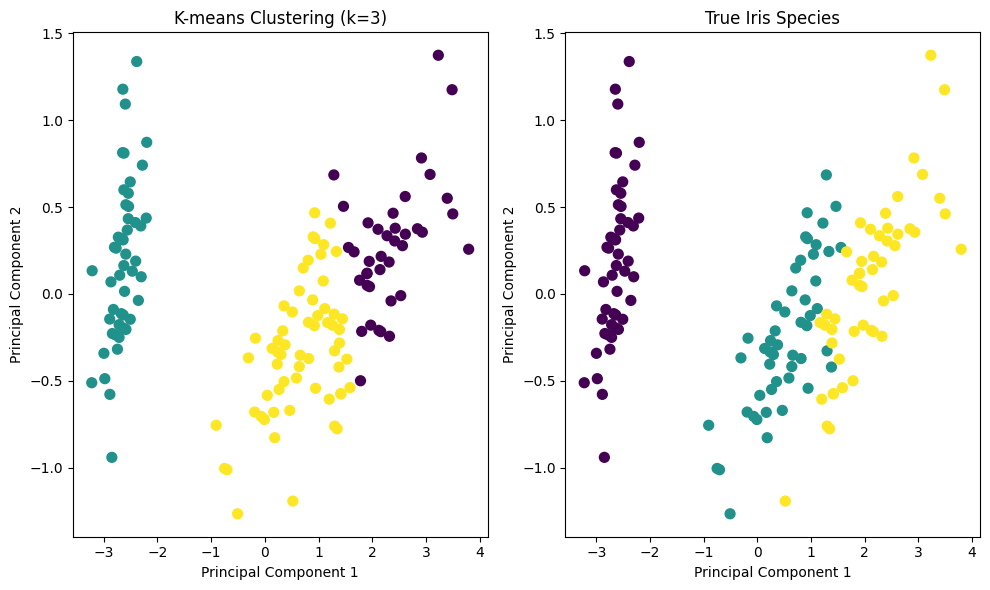

In [44]:
# 시각화
plt.figure(figsize=(10, 6))

# K-means 클러스터링 결과
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 실제 붓꽃 종류별 시각화
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['species_code'], cmap='viridis', s=50)
plt.title('True Iris Species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# labels = ['Setosa', 'Versicolor', 'Virginica']
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=8),
#            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C1', markersize=8),
#            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C2', markersize=8)]
# plt.legend(handles, labels, title='Species')

# 그래프 표시
plt.tight_layout()
plt.show()



앙상블기법

보팅 (투표)
배깅
부스팅
스태킹



2. 앙상블 기법의 종류 및 원리
2.1 보팅(Voting)
보팅은 여러 개의 서로 다른 모델의 예측 결과를 결합하여 최종 결과를 결정하는 방식입니다. 하드 보팅은 다수결 원리에 따라 가장 많은 표를 얻은 결과를 최종 예측값으로 선택하며, 소프트 보팅은 각 모델이 출력한 확률값을 평균 내어 최종 예측을 수행합니다.


In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드 및 분할
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 모델 정의
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)  # soft voting을 위한 확률 출력 필요
dt_clf = DecisionTreeClassifier()

# 보팅 분류기 정의 (소프트 보팅)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting='soft')

# 모델 학습 및 예측
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"보팅 분류기 정확도: {accuracy:.4f}")


보팅 분류기 정확도: 1.0000


2.2 배깅(Bagging)
배깅(Bootstrap Aggregating)은 데이터를 여러 번 샘플링하여 각 샘플에서 독립적으로 학습된 모델의 예측 결과를 평균 또는 다수결 방식으로 결합하는 기법입니다.
 **랜덤 포레스트(Random Forest)**가 대표적인 배깅 알고리즘입니다.

In [46]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 정의
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습 및 예측
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"랜덤 포레스트 정확도: {accuracy:.4f}")


랜덤 포레스트 정확도: 1.0000


2.3 부스팅(Boosting)
부스팅은 약한 학습기(Weak Learner)를 순차적으로 학습시키며, 각 모델이 이전 모델의 오류를 보완하는 방식으로 동작합니다.
XGBoost, AdaBoost가 대표적인 부스팅 알고리즘입니다. 부스팅은 모델의 편향을 줄이는 데 효과적입니다.

In [48]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 데이터 로드 및 분할
boston = load_iris()  # iris 데이터를 사용
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# XGBoost 모델 정의
xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# 모델 학습
xg_clf.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = xg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost 정확도: {accuracy:.4f}")


XGBoost 정확도: 1.0000
